In [73]:
import pandas as pd
import csv
import math
from io import StringIO

def pre_process_college_csv(csv_string):
    cat_str = '1G, 1K, 1R, 2AG, 2AK, 2AR, 2BG, 2BK, 2BR, 3AG, 3AK, 3AR, 3BG, 3BK, 3BR, GM, GMK, GMR, SCG, SCK, SCR, STG, STK, STR'
    categories = cat_str.split(', ')
    
    csv_string = csv_string.strip()
   
    csv_file = StringIO(csv_string)
    csv_reader = list(csv.reader(csv_file))
    
    numeric_ranking = lambda rank: None if rank == '--' else int(rank)
    
    branches = [row[0] for row in csv_reader]
    branches = list(filter(lambda x: x, branches))
    
    category_rankings = [row[1:] for row in csv_reader]
    category_rankings = list(filter(any, category_rankings))
    category_rankings = [list(map(numeric_ranking, row )) for row in category_rankings]
    
    records = []
    for branch, category_ranking in zip(branches, category_rankings):
        for category, rank in zip(categories, category_ranking):
          records.append([branch, category, rank])

    return records


    

In [74]:
vtu_college_cuttoff_data = open('cutoff_better_v1.csv').read()
import re
college_csv_tables = re.split(r'E\d{3}.*', vtu_college_cuttoff_data)
college_csv_tables = list(filter(lambda x: x, college_csv_tables))

In [75]:
college_code_and_names = """
E001   University of Visvesvaraya College of Engineering  Bangalore
E002  S K S J T Institute of Engineering.  Bangalore
E003  B M S College of Engineering  Basavanagudi,Bangalore
E004  Dr. Ambedkar Institute Of Technology  Bangalore
E005  R. V. College of Engineering  Bangalore
E006  M S Ramaiah Institute of Technology  Bangalore
E007  Dayananda Sagar College of Engineering   Bangalore
E008  Bangalore Institute of Technology  Bangalore
E009  P E S University (Ring Road Campus)  Bangalore
E011  M V J College of Engineering  Bangalore
E012  Sir M.Visveswaraya Institute of Technology  Hunasemaranahalli,Bangalore,
E013  Ghousia Engineering College  Ramanagara
E014  S J C Institute of Technology  Chickballapur
E015  Dr.T.Thimmaiah Institute of Technology  BANGARAPET -TQ kolar District
E016  Siddaganga Institute of Technology  Tumkur
E017  Sri Siddartha Institute of Technology  Tumkur
E018  Kalpatharu Institute of Technology  Tiptur
E021  Sri Jayachamarajendra College of Engineering(Const. of JSS Univ.)  Mysore
E022  The National Institute of Engineering(SOUTH CAMPUS)  Mysore
E023  P E S College of Engineering  Mandya
E024  Malnad College of Engineering  Hassan
E028  Tontadarya College of Engineering  Gadag
E029  Maratha Mandal Engineering College  Belgaum
E030  KLE Technological University(Formerly BVBCET)  Hubli
E031  Basaveshwara Engineering College  Bagalkot
E032  R.T.E Socity`s Rural Engineering College  Hulkoti
E033  Sri Taralabalu Jagadguru Institute of Technology.  Ranebennur
E034  Sri Dharmasthala Manjunatheswara College of Engineering  Dharwad
E035  Anjuman Engineering College  Bhatkala, Uttar kannada Dist
E036  KLE Technological University(Formerly KLE Dr.MS Sheshagiri Col.)  Belgaum
E037  K.L.S. Gogte Institute of Technology  Belgaum
E038  B L D E As V.P. Dr. P. G. Hallakatti College of Engg. and Tech.  vijayapur
E040  Hira Sugar Institute of Technology  Belagavi District,
E041  P D A College of Engineering  Gulbarga
E042  Khaja Banda Nawaz University  Kalburgi
E043  Gurunanak Dev Engineering College  Bidar
E044  Bheemanna Khandre Institute of Technology  Bhalki
E045  Rao Bahadur Y.Mahabaleswarappa Engineering College  Bellari
E046  H K Es S L N College of Engineering  Raichur
E047  Malnad College of Engineering  Hassan
E048  B M S College of Engineering  Basavanagudi,Bangalore
E049  Basaveshwara Engineering College  Bagalkot
E054 K V G College of Engineering Sullia,D.K District
E055  P A College of Engineering  Bantwal, Mangalore
E056  The National Institute of Engineering(SOUTH CAMPUS)  Mysore
E057  JSS Science and Technology University(Formerly SJCE)  Mysore
E058  P E S College of Engineering  Mandya
E059  P D A College of Engineering  Gulbarga
E060  Dr. Ambedkar Institute Of Technology  Jnanabharathi Campus,Bangalore
E061  University B.D.T. college of Engineering  Davangere
E062  Bapuji Institute of Engineering and Technology  Davangere
E063  Sri Jagadguru Murugharajendra University (Formerly SJMIT)  Chitradurga
E064  Adhichunchanagiri Institute of Technology  Chickmagalur
E065  Jawaharlal Nehru National College of Engineering  Shimoga
E070  Bahubali College of Engineering  Hassan Dist,
E071  Vidya Vardhaka College of Engineering  Mysuru
E075  Ballari Institute of Technology and Management  Near Allipur Bellary
E077  Vidya Vikas Institute of Engineering and Technology  Mysuru
E078  The Oxford College of Engineering  Bangalore
E079  Acharya Institute of Technology  Bangalore
E081  H M S Institute of Technology  Tumkur
E082  J S S Academy of Technical Education  Bangalore
E083  H.K.B.K.College of Engineering  Bangalore
E085  APS College of Engineering  Somanahalli, Bangalore
E086  Sri Sairam College of Engineering(Formerly Shirdi Sai Engg)  Anekal,Bangalore
E087  Vivekananada Institute of Technology  Bangalore
E088  Bangalore College of Engineering and Technology  Chandapura, Bangalore
E090  Sri Revana Siddeswara Institute of Technology  Bangalore North
E091  K S Institute of Technology  Bangalore
E092  Vemana Institute of Technology  Bangalore
E093  Basavakalyana Engineering College  Basavakalyana, Bidar-Dist
E094  Coorg Institute of Technology  Kodagu
E095  AMC Engineering College  Bangalore
E096  East Point College of Engineering and Technology  Bangalore
E097  C M R Institute of Technology  Bangalore
E098  Atria Institute of Technology  Bangalore
E099  New Horizon College of Engineering  Bangalore
E100  K N S Institute of Technology  Bangalore
E101  Channabasaveshwara Institute of Technology  Gubbi, Tumkur
E102  DONBOSCO Institute of Technology  Bangalore
E103  Global Academy of Technology  Bangalore
E104  Nagarjuna College of Engineering and Technology  Bangalore (R)
E105  Nitte Meenakshi Institutute of Technology  Bangalore
E106  East West Institute of Technology  Bangalore
E107  B N M Institute of Technology  Bangalore
E108  Sapthagiri College of Engineering  Bangalore
E109  City Engineering College  Bangalore
E111  Sri Venkateshwara College of Engineering  Bettahalsur(P), Bangalore
E112  Sri Krishna Institute of Technology  Bangalore
E113  Sambhram Institute of Technology  Bangalore
E114  G M Institute of Technology  Davanagere
E115  S J B Institute of Technology  Kengeri,Bangalore
E116  R.L.Jalappa Institute of Technology  Bangalore Rural Dist
E118  RNS Institute of Technology  Bangalore
E119  K C T Engineering College  Roza(B),Gulbarga
E120  Jnanavikasa Institute of Technology  Ramanagar-Dist
E121  Vivekananada College of Engineering Technology  D K DIST
E123  Canara Engineering College Bantwal  DK DIST
E124  Rajiv Gandhi Institute of Technology  R.T Nagar Post, Bangalore
E126  B M S Institute of Technology and Management  Yelahanka, Bangalore
E127  M S Engineering College  Bangalore Urban
E128  Sharnbasva University(Formerly Appa Inst. of Tech.)  Brahmpur, Kalaburagi
E129  St. Joseph Engineering College  Mangalore
E130  Shridevi Institute of Engineering and Technology  Tumkur
E132  Secab Institute of Engineering and Technology  Bijapur
E133  G S S S Institute of Engineering and Technology for Women  Mysore
E134  Smt. Kamala and Sri Venkappa M.Agadi College of Engg. and Tech.  Laxmeshwara-Tq, Gadag Dt.
E135  K L S Viswanathrao Deshpande Institute of Technology  Haliyal, Uttara Kannada -Dist
E136  Moodalakatte Institute of Technology  Udupi District
E139  Impact College of Engineering and Applied Sciences  Bangalore
E141  P E S University (Electronic City Campus)  Bangalore
E142  Adichunchanagiri University(Formerly BGSIT)  Nagamangala Taluk,Mandya Dist.
E144  Srinivas Institute of Technology  Mangalore.
E145  Rajarajeswari College of Engineering  Kumbalagodu,Bangalore
E146  Shreedevi Institute of Technology  Kenjar, Mangalore
E147  T.John Engineering College  Bangalore
E149  Cambridge Institutute of Technology  Bangalore
E150  P E S Institute of Technology and Management   Shivamogga
E151  Mangalore Institute of Technology and Engineering  Mangalore Tq,D.K
E152  S D M Institute of Tech.  Ujire,Dakshina Kannada
E153  S E A College of Engineering and Technology  K R puram bangalore
E154  Government Engineering College  Chamarajanagara
E155  Government Engineering College  Hassan
E156  Government Engineering College  K R Pet, Mandya DT.
E157  Government Engineering College  Ramanagara
E158  Maharaja Institute of Technology-Mysore  Belawadi, Mandya Dist
E159  Karavali Institute of Technology  Mangalore
E160  Sahyadri College of Engg. and Management  Mangalore
E161  Government Engineering College  Kushalnagar,Kodagu Dist
E162  Government Engineering College  Raichur
E163  Government Engineering College  Devagiri,Haveri
E164  Government Engineering College  Huvina Hadagali,Bellary Dist.
E165  Yenepoya Institute of Technology  Thodar,Moodbidri
E166  K L E Institute of Technology  Hubli
E167  K L E Ss K L E College of Engineering and Technology  Chikkodi, Belgaum Dist.
E168  Amrutha Institute of Engineering and Mangement  Bidadi Indust. Estate,Ban'lore
E169  Alva`s Institute of Engineering and Technology  Moodabidri,
E171  Brindavan College of Engineering  Yelahanka, Bangalore
E172  R.R.Institute of Technology  Chikkabanavara, Bangalore
E173  Sai Vidya Institute of Technology  Bangalore
E174  Dr. Sri. Sri. Sri. Shivakumara Mahaswamyji College of Engineering  Bangalore Rural -Dist,
E175  S.G.Balekundri Institute of Technology  Belgaum
E176  Navodaya Institute of Technology  Raihcur
E177  Rajeev Institute of Technology  Hassan
E178  The National Institute of Engineering(NORTH CAMPUS)  Mysore
E180  Bearys Institute of Technology  Mangalore
E183  Sha-Shib College of Engineering  Chickballapur
E184  C Byre Gowda Institute of Technology  Kolar
E185  Angadi Institute of Technology and Management  Belgaum
E186  ACS College of Engineering  Kengeri Hobli,Bangalore
E188  Vijaya Vittala Institute of Technology   Bangalore
E189  Navkis College of Engineering (Formerly NDRKIT)  Kandali, Hassan
E191  Akshaya Institute of Technology  Tumkur
E193  Srinivas University  Mukka, Suratkal, Mangalore
E194  Government Engineering College  KARWAR
E196  Jain College of Engineering  Machche,Belgaum
E197  Veerappa Nisty Engineering College  Yadigir Dist
E198  Sharnbasva University College for Women(Formerly Godutai)  Gulbarga
E199  AGM Rural Engineering College  Hubli, Darward (D)
E201  Gopalan College of Engineering and Management  White Field, Bangalore
E202  Sampoorna Institute of Technology and Research  Ramanagara (D)
E203  K.S. School of Engineering And Management  Mallasandra, Bangalore
E204  Bangalore Technological  Institute  Sarjapura Rd, Bangalore
E205  ATME College of Engineering  Varun  hobli,Mysore
E206  Shri Madhwa Vadiraja Institute of Technology and Management  Udupi Dist
E207  VSMs Somashekar R Kothiwale Institute of Technology  Nippani, Belgaum- Dist
E209  Jyothi Institute of Technology  Bangalore
E211  Jain Institute of Technology  Cross,Davanagere
E212  Dayananda Sagar Academy of Technology  Kanakapur Main Road Bangalore
E213  Lingarajappa Engineering College  Bidar
E216  Shetty Institute of Technology  Gulbarga
E219  Mangalore Marine College and Technology   Mangalore
E220  Alliance University  Bangalore
E221  Biluru Gurubasava Mahaswamiji Institute of Technology  Mudhol,Bagalkot- Dist
E222  Cambridge Institutute of Technology-North Campus  Devanahalli(TQ),Bangalore(R)
E227  Cauvery Institute of Technology  Mandya tq
E232  Reva University  Bangalore
E235  M.S. Ramaiah University of Applied Sciences  Bangalore
E237  Presidency University  Yelahanka, Bangalore
E238  Mysuru Royal Institute of Technology  Mandya (D)
E239  East West College of Engineering  Yelahanka New Town, Bangalore
E240   Dayananda Sagar University Hosur Road, Bangalore
E241  KLE Technological University(Formerly BVBCET)  Dharward Dist
E252  Mysore College of Engineering and Management  Mysore
E254  A J Institute Of Engineering And Technology  MANGALORE
E255  Gitam School Of Technology  BANGALORE RURAL DIST
E257  CMR University  CHAGALATTI, BANGALORE
E258  Maharaja Institute of Technology  THANDAVAPURA, MYSORE
E260  Nitte School of Architecture  YELAHANKA BANGALORE
E263  School of Planning and Architecture  Mysore
E265  Jain College of Engineering and Technology  Hubballi
E269  Jain College of Engineering and Research  Udyambhag, Belgaum
E272  Government Engineering College  Talakal,Koppal
E273  Government Engineering College  Viprasainagar, Gangavathi
E274  Government Engineering College  Moselehosahalli,Hassan
E275  R V Institute of Technology and Management  JP Nagar, Bengaluru
E278  Visvesvaraya Technological University  Muddenahalli,Chickkaballapur
E279  Visvesvaraya Technological University  Belgaum
E281  Government Engineering College  Challakere,Chitradurga
E283  University of Mysore  Mysore
E284  Sri Jayachamarajendra College of Engineering(Const. of JSS Univ.)  Mysore
E285  R V University  Bangalore
E286  BGS College of Engineering and Technology  Mahalakshmipuram,Bangalore
E287  Vidyashilp University  Bangalore
E288  Garden City University  Bangalore
E289  Visvesvaraya Technological University - Regional Center  Rajapur,Kalburgi
E290  Visvesvaraya Technological University - Regional Center  Mysore
E291  Government Engineering College  Naragund,Gadag
E292  Government Engineering College  Bidar
""".strip().split('\n')


In [76]:
records = []
for college_code_plus_name, college_csv_table in zip(college_code_and_names, college_csv_tables):

    college_code, *rest = college_code_plus_name.split()
    college_name = ' '.join(rest)
    
    pre_processed_college_records = pre_process_college_csv(college_csv_table)
    for pre_processed_record in pre_processed_college_records:
        records.append([college_code, college_name] + pre_processed_record)
        

In [77]:
vtu_engineering_colleges = pd.DataFrame(records)
vtu_engineering_colleges.columns = ['college_code', 'college_name', 'branch', 'category', 'rank']

In [78]:
# a) for a given rank and given category and a given branch list all colleges where seats are available

In [79]:
rank = 78
category = '2AG'
branch = 'CS Computers'

branches = vtu_engineering_colleges[vtu_engineering_colleges['branch'] == branch]
categories = branches[branches['category'] == category]
colleges = categories[categories['rank'] >= rank]

In [80]:
# b) Show top 10 colleges based on avg CS cutoff ranks in a bar chart format

In [81]:
def average_rank_branch(branch, college_code):
    df = vtu_engineering_colleges
    college_df = df[df['college_code'] == college_code]
    
    df = college_df
    college_branch_df = df[df['branch'] ==  branch]
    
    average_branch_rank = college_branch_df['rank'].mean(skipna=True)

    return math.floor(average_branch_rank)

In [82]:
average_rank_branch('CS Computers', 'E001')

6311

In [83]:
records = []
branch = 'CS Computers'
only_cs_colleges = vtu_engineering_colleges[vtu_engineering_colleges['branch'] == branch]

for college_code in only_cs_colleges['college_code'].unique():
    records.append([college_code, average_rank_branch(branch, college_code)])

In [84]:
sorted_records = sorted(records, key=lambda x: x[1])

In [85]:
top_n_records = lambda x: sorted_records[:x]

In [89]:
records = top_n_records(12)

In [90]:
records

[['E005', 2019],
 ['E006', 2802],
 ['E048', 3958],
 ['E021', 4673],
 ['E009', 6006],
 ['E001', 6311],
 ['E057', 7959],
 ['E007', 9104],
 ['E284', 9610],
 ['E008', 10754],
 ['E016', 11643],
 ['E241', 11835]]

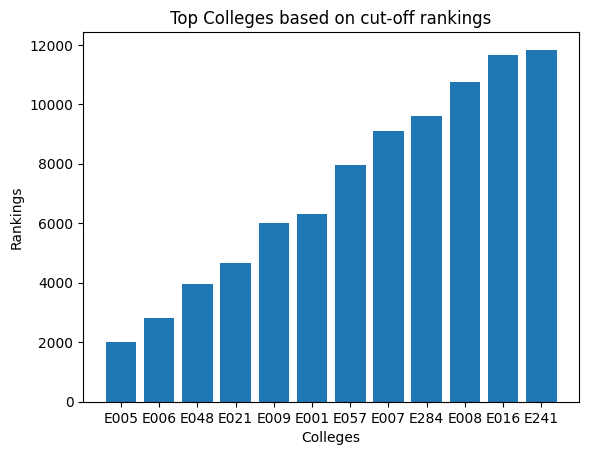

In [91]:
import matplotlib.pyplot as plt

# Sample data
college_codes = [row[0] for row in records]
average_ranks = [row[1] for row in records]
# Plotting the bar graph
plt.bar(college_codes, average_ranks)

# Adding labels and title
plt.xlabel('Colleges')
plt.ylabel('Rankings')
plt.title('Top Colleges based on cut-off rankings')

# Display the plot
plt.show()

In [92]:
# c) For a college show a horizontal bargraphs showing branchwise average cutoff ranking
college_code = 'E001'

college_df = vtu_engineering_colleges[vtu_engineering_colleges['college_code'] == college_code]


In [93]:
records2 = []
for x, y in college_df.groupby('branch'):
    records2.append([x, y['rank'].mean(skipna=True)])

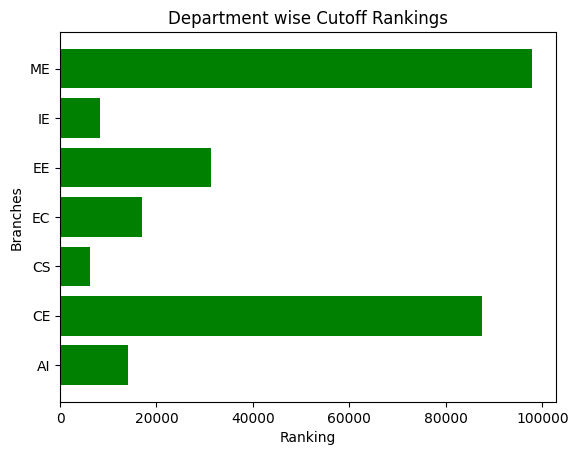

<Figure size 10000x6000 with 0 Axes>

In [94]:
# Sample data
branches = [row[0][:2] for row in records2]
average_ranks = [row[1] for row in records2]
# Plotting the bar graph
plt.barh(branches, average_ranks, color='green')

# Adding labels and title
plt.xlabel('Ranking')
plt.ylabel('Branches')
plt.title('Department wise Cutoff Rankings')
plt.figure(figsize=(100, 60))

# Display the plot
plt.show()

In [95]:
#d) For a student with a certain rank and category 
# show all colleges on a scatter plot where 
# he can get admission where x-axis represent college and y-axis represents branch

In [98]:
rank = 125000
category = '3AR'

categories = vtu_engineering_colleges[vtu_engineering_colleges['category'] == category]
colleges = categories[categories['rank'] >= rank]

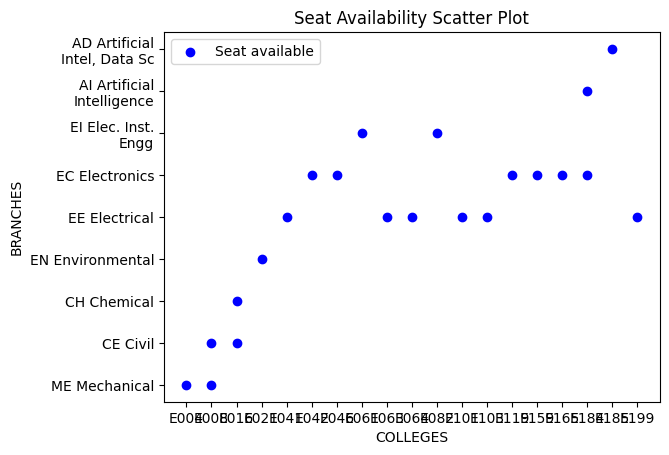

In [100]:
x = colleges['college_code']
y = colleges['branch']

#plt.figure(figsize=(250, 40))  # Adjust the width and height as needed

# Creating a scatter plot
plt.scatter(x, y, color='blue', marker='o', label='Seat available')

# Adding labels and title
plt.xlabel('COLLEGES')
plt.ylabel('BRANCHES')
plt.title('Seat Availability Scatter Plot')

# Adding a legend
plt.legend()

# Display the plot
plt.show()